In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/flowers-dataset")

print("Path to dataset files:", path)

100%|██████████| 219M/219M [00:13<00:00, 17.4MB/s] 

Extracting files...


Path to dataset files: C:\Users\angel\.cache\kagglehub\datasets\rahmasleam\flowers-dataset\versions\1


In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [7]:
path = os.path.join(path, "flower_photos")

In [10]:
labels = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]
rawdata = []
for label in labels: 
    folder = os.path.join(path, label)
    for name in os.listdir(folder):
        # Open file
        with Image.open(os.path.join(folder, name)) as img:
            img = np.asarray(img)
            rawdata.append((img, label))

In [ ]:
df = pd.DataFrame(rawdata, columns=["image", "label"])
df.to_pickle("raw_dataframe.pkl")

In [91]:
test_img = df.loc[0, "image"]

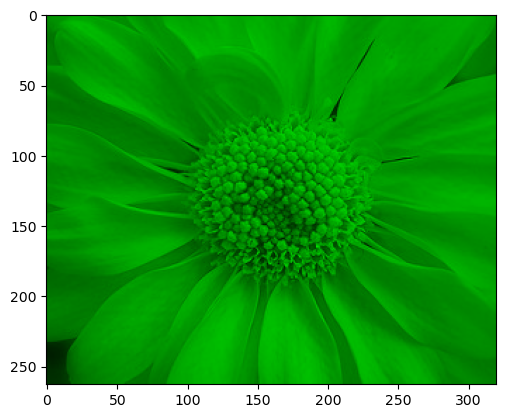

In [93]:
def seperate_RGB(test_img):
    color = np.zeros(test_img.shape, dtype=np.uint8)
    R, G, B = color.copy(), color.copy(), color.copy()
    R[:, :, 0] = test_img[:, :, 0]
    G[:, :, 1] = test_img[:, :, 1]
    B[:, :, 2] = test_img[:, :, 2]
    return R, G, B
R, G, B = seperate_RGB(test_img)
plt.imshow(G)

In [96]:
df["height"] = df.apply(lambda x: len(x["image"]), axis=1)
df["width"] = df.apply(lambda x: len(x["image"][0]), axis=1)

In [100]:
import seaborn as sns

In [148]:
approx_dims = df.copy()
approx_dims[["width", "height"]] = approx_dims[["width", "height"]].round(-1)
size_counts = approx_dims.groupby(["width", "height", "label"]).count().reset_index()

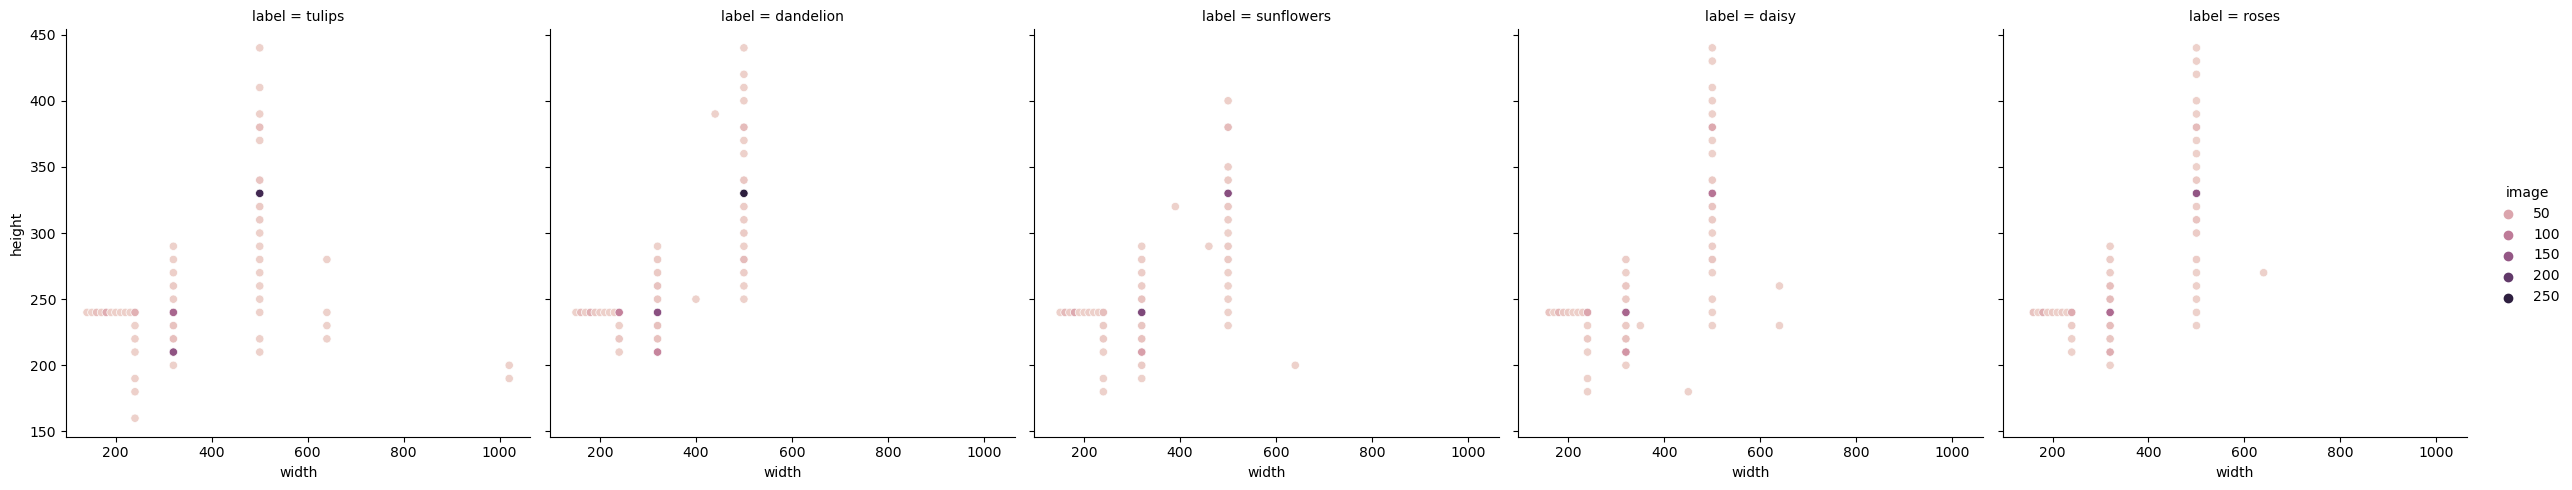

In [150]:
sns.relplot(
    data=size_counts, x="width", y="height",
    col="label", hue="image", 
    kind="scatter"
)

<Axes: xlabel='dimension', ylabel='pixels'>

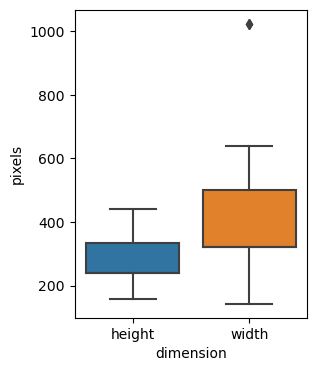

In [155]:
dim = pd.melt(df[["height", "width"]], var_name="dimension", value_name="pixels")
plt.figure(figsize=(3, 4))
sns.boxplot(y=dim["pixels"], x=dim["dimension"])

In [162]:
df["width"].value_counts()

320    1502
500    1383
240     302
180     155
159      80
       ... 
228       1
227       1
350       1
212       1
218       1
Name: width, Length: 91, dtype: int64

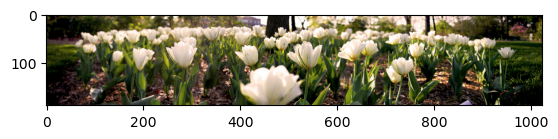

In [168]:
plt.imshow(df.loc[df["width"] == df["width"].max(), "image"][3494])

In [298]:
def get_hist(df, index):
    pixels = np.concatenate(df["image"].apply(lambda x: np.ravel(x[:,:,index])))
    return pd.Series(pixels).value_counts().reset_index().sort_values("index"), pixels.mean(), pixels.std()
def get_color_hists(df):
    return (get_hist(df, 0), get_hist(df, 1), get_hist(df, 2))

In [373]:
R, G, B = get_color_hists(df.loc[df["label"] == "roses"].reset_index())

In [377]:
def plot_hist(col, color):
    plt.plot(col[0]["index"], col[0][0], color=color)
    plt.fill_between(col[0]["index"], col[0][0], color=color, alpha=0.1)
    plt.axvline(col[1], color=color)


Text(0.5, 1.0, 'RGB Histogram: Sunflowers')

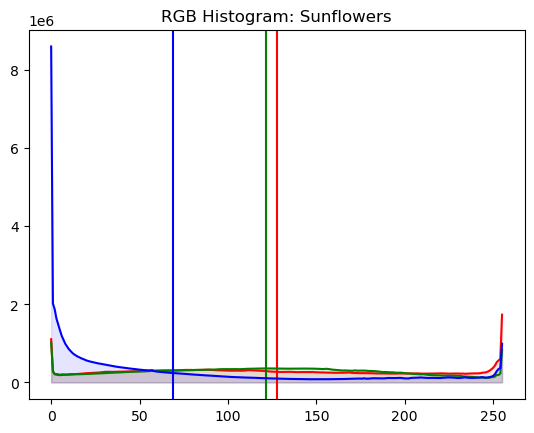

In [381]:
R, G, B = get_color_hists(df.loc[df["label"] == "sunflowers"].reset_index())
plot_hist(R, "red")
plot_hist(G, "green")
plot_hist(B, "blue")
plt.title("RGB Histogram: Sunflowers")

Text(0.5, 1.0, 'RGB Histogram')

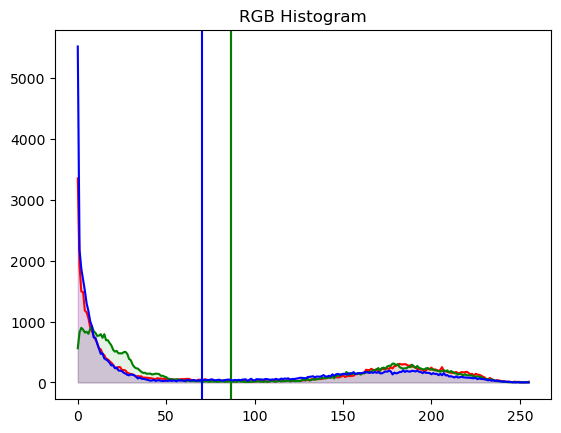

In [358]:
plot_hist(R, "red")
plot_hist(G, "green")
plot_hist(B, "blue")
plt.title("RGB Histogram")

Text(0, 0.5, 'Count')

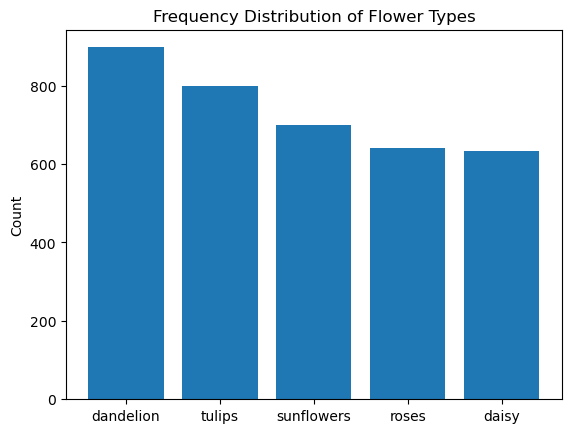

In [184]:
freq = df["label"].value_counts().reset_index()
plt.bar(freq["index"], freq["label"])
plt.title("Frequency Distribution of Flower Types")
plt.ylabel("Count")